# Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=1000, n_features=10, shuffle=True, random_state=42, cluster_std=3.0, centers=5)
# X = pd.read_csv("../data/mallcustomers.csv").drop(columns=["CustomerID"]).rename(columns={"Annual Income (k$)": "annual_income", "Spending Score (1-100)": "spending_score"})
# X.columns = [c.lower() for c in X.columns]

# X.loc[X['gender'] == 'Male', 'gender'] = 1
# X.loc[X['gender'] == 'Female', 'gender'] = 0

In [3]:
ss = StandardScaler()
X_ss = pd.DataFrame(ss.fit_transform(X), columns=[f'{c}_ss' for c in range(0, X.shape[1])])

In [4]:
from dstoolkit.automl import AutoMLGaussianMixture

/home/junior/GitHub/data-science-toolkit/venv/lib64/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
a = AutoMLGaussianMixture(X_ss, n_trials=100)

In [6]:
a.train()

/home/junior/GitHub/data-science-toolkit/venv/lib64/python3.13/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
/home/junior/GitHub/data-science-toolkit/venv/lib64/python3.13/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
/home/junior/GitHub/data-science-toolkit/venv/lib64/python3.13/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
/home/junior/GitHub/data-science-toolkit/venv/lib64/python3.13/site-packages/optuna/trial/_trial.py:678: RuntimeWarning: Inconsistent parameter values for di

In [7]:
a.get_metrics()

,Base GaussianMixture Model,PCA GaussianMixture Model,UMAP GaussianMixture Model
Silhouetete,0.356860,0.550103,0.918364
Davies Bouldin,1.129784,0.749743,0.120214
Calinski Harabasz,517.436211,1456.781880,78418.960938


Base GaussianMixture Model


Silhouetete            0.356860
Davies Bouldin         1.129784
Calinski Harabasz    517.436211
Name: Base GaussianMixture Model, dtype: float64

X has more than 5 features, selecting the first 5 for visualization.


<Figure size 1000x600 with 0 Axes>

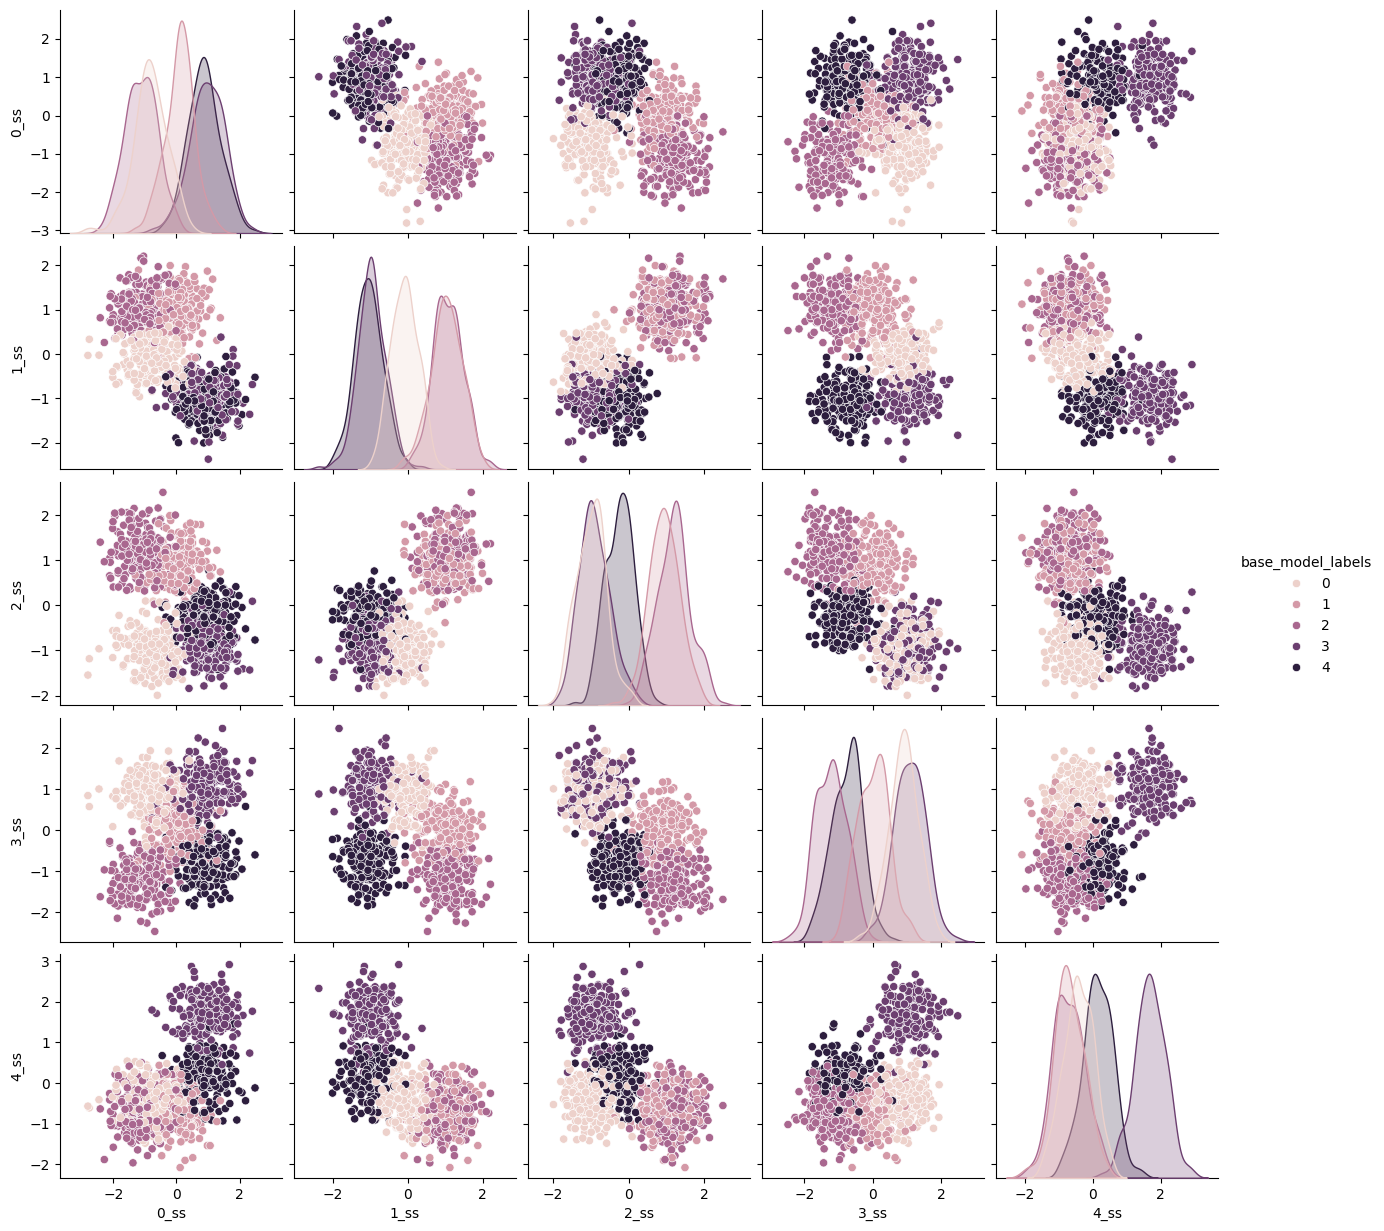

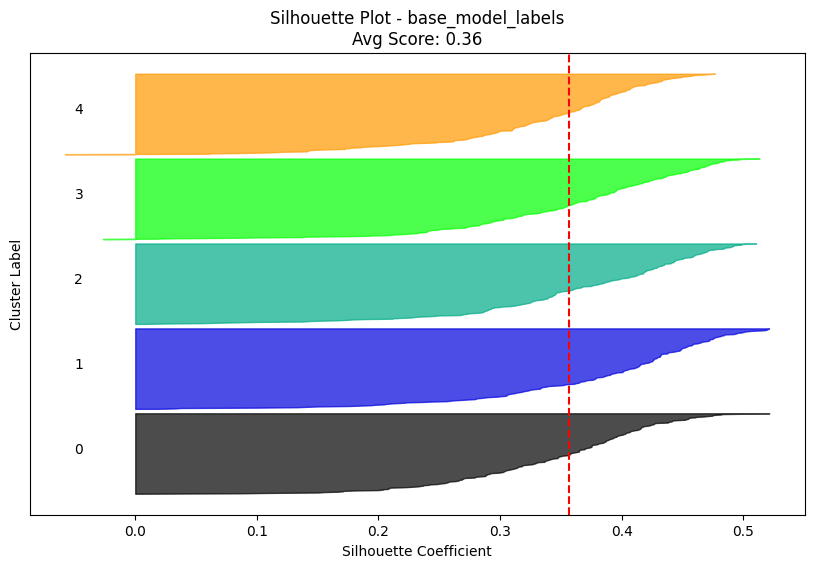

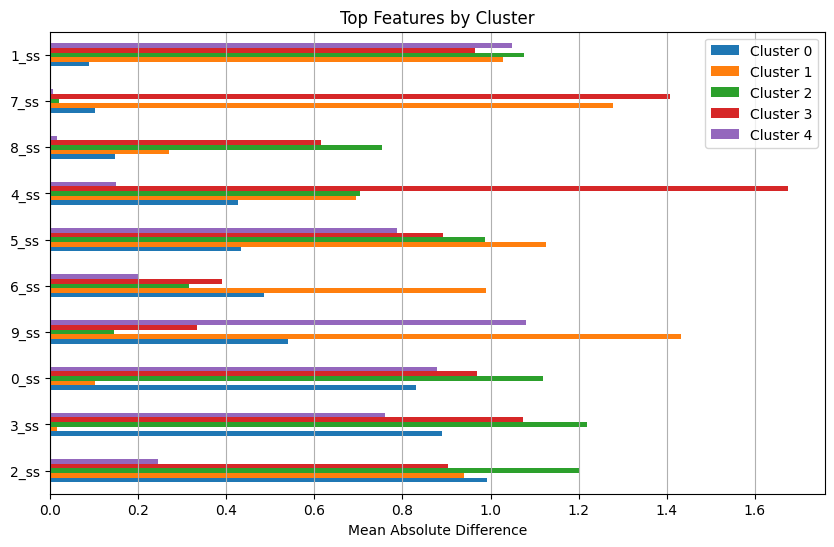

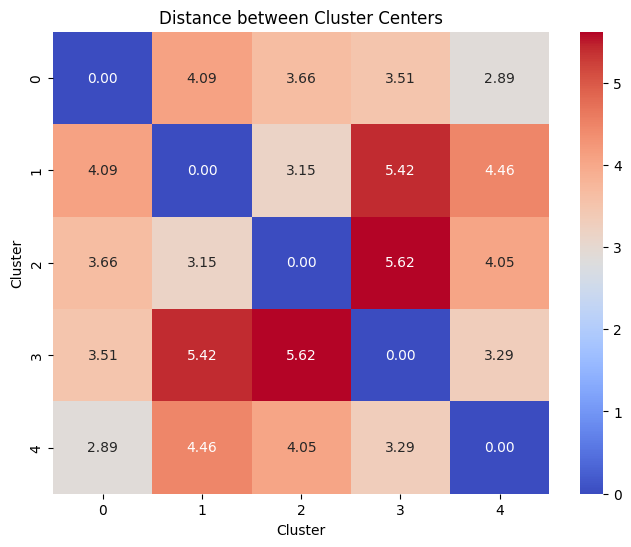

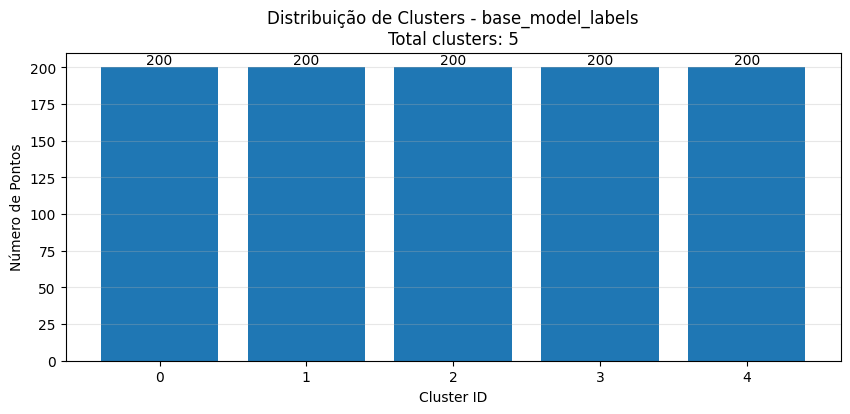

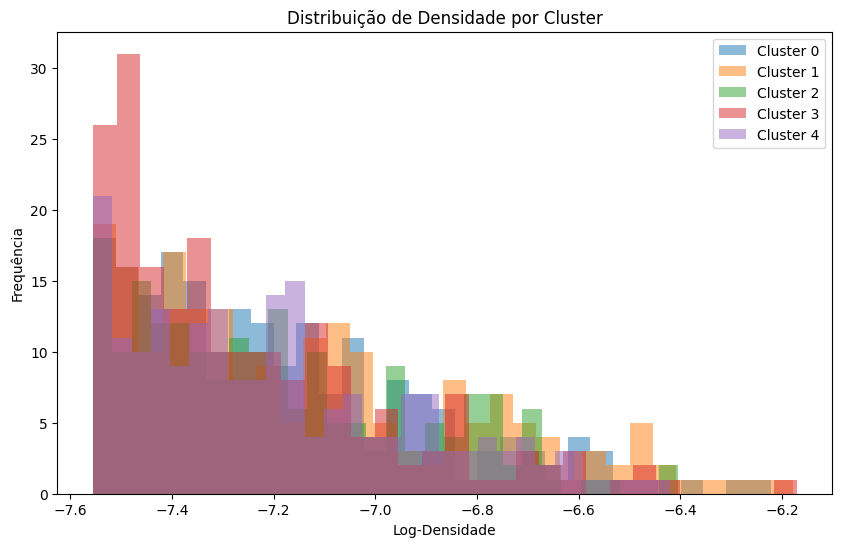

PCA GaussianMixture Model


Silhouetete             0.550103
Davies Bouldin          0.749743
Calinski Harabasz    1456.781880
Name: PCA GaussianMixture Model, dtype: float64

<Figure size 1000x600 with 0 Axes>

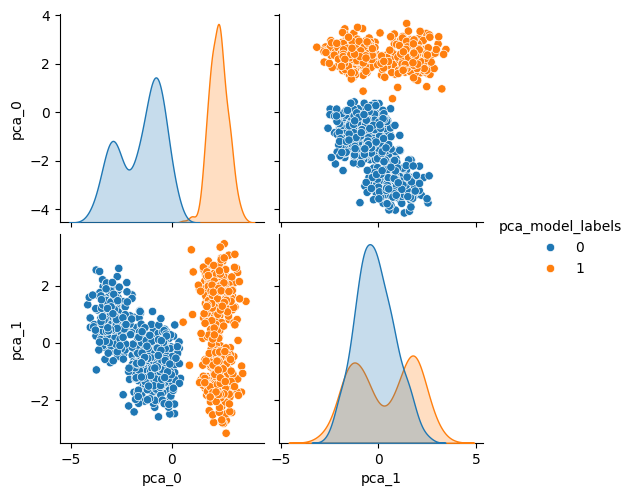

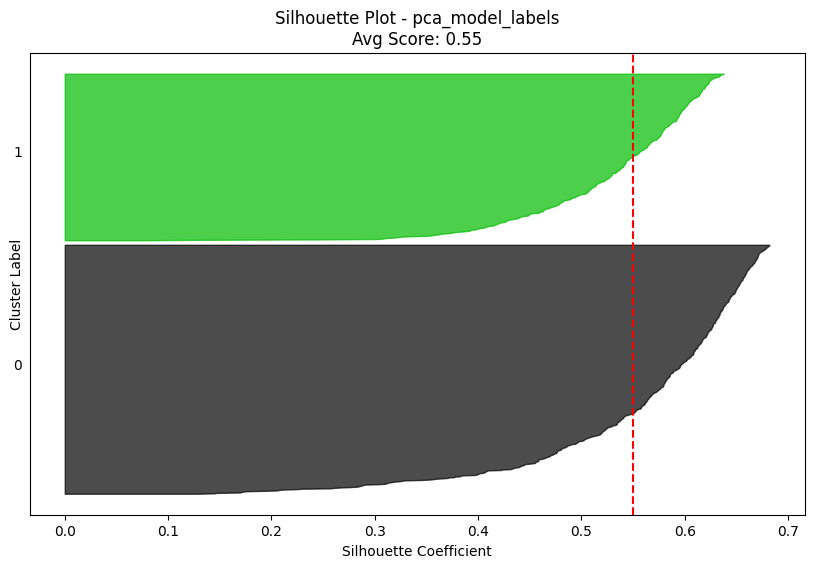

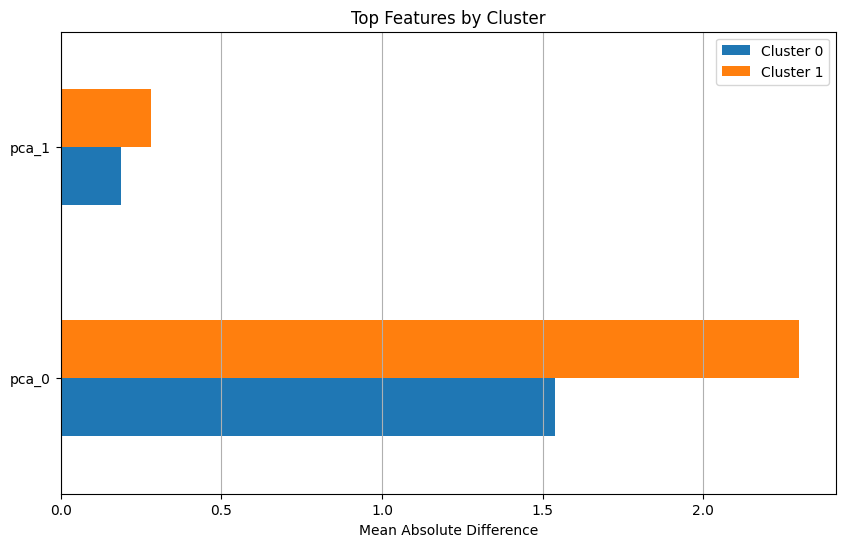

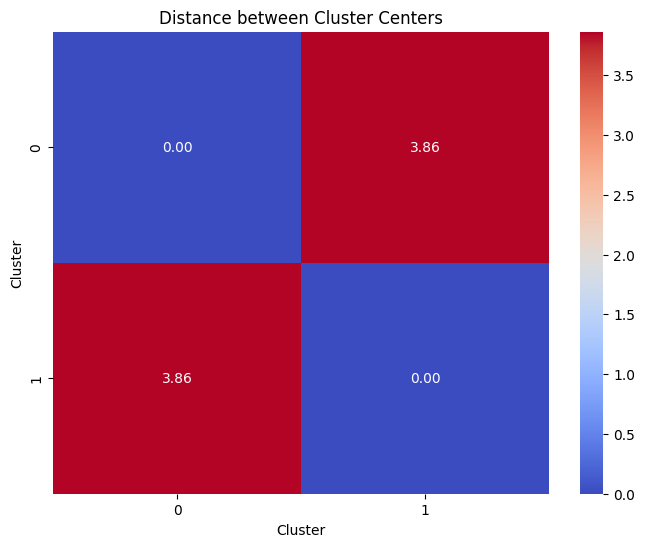

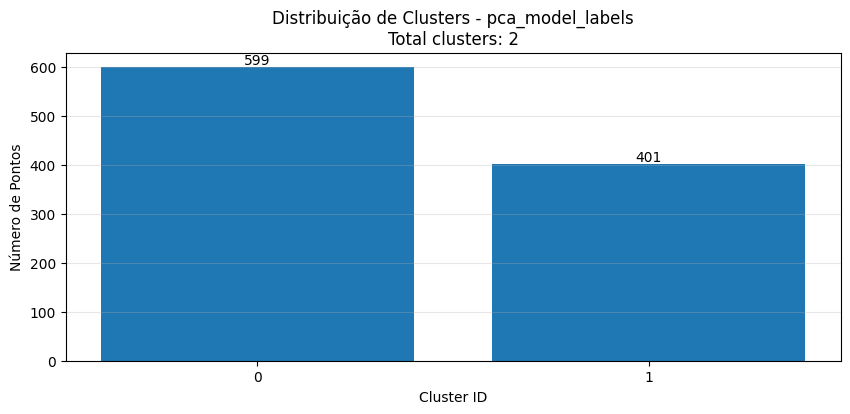

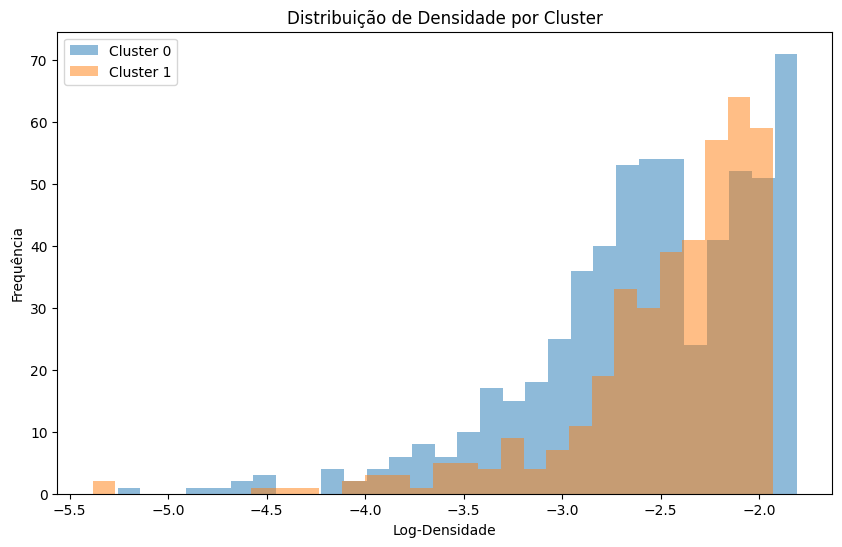

UMAP GaussianMixture Model


Silhouetete              0.918364
Davies Bouldin           0.120214
Calinski Harabasz    78418.960938
Name: UMAP GaussianMixture Model, dtype: float64

<Figure size 1000x600 with 0 Axes>

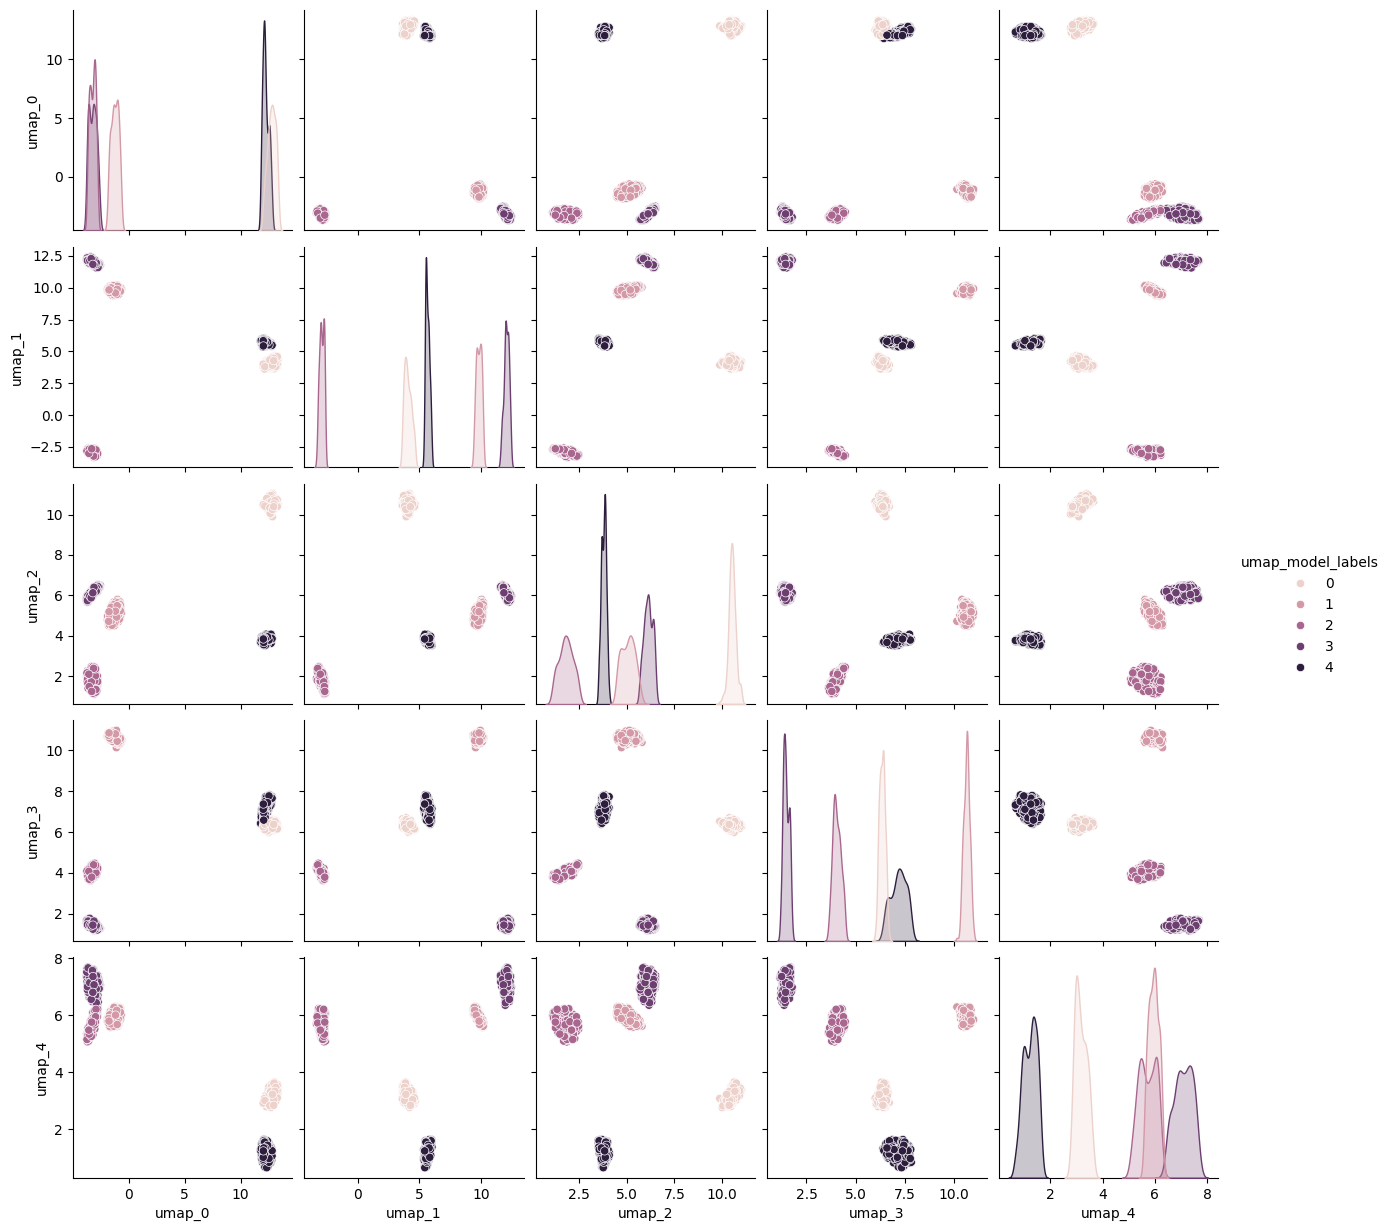

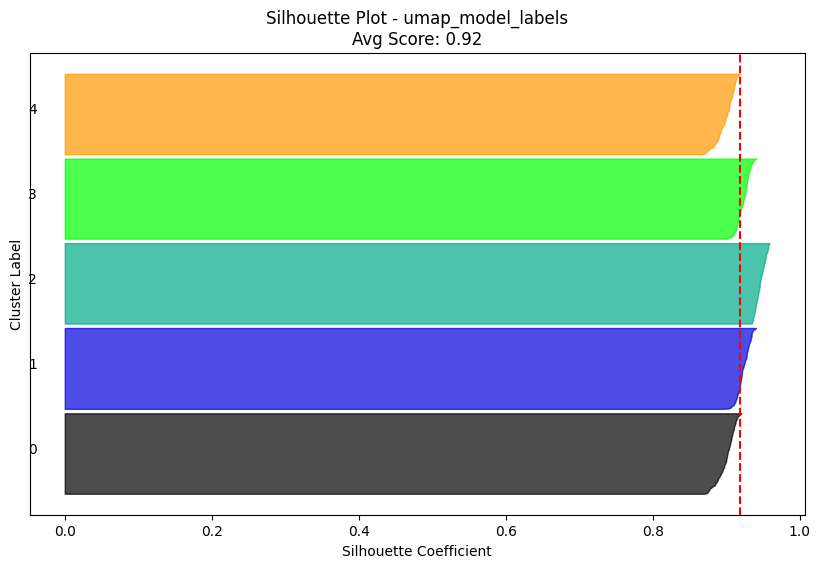

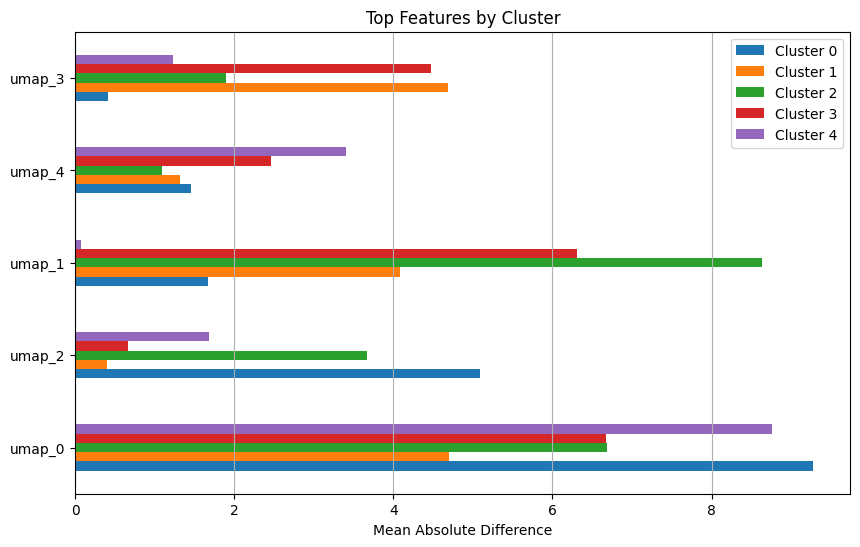

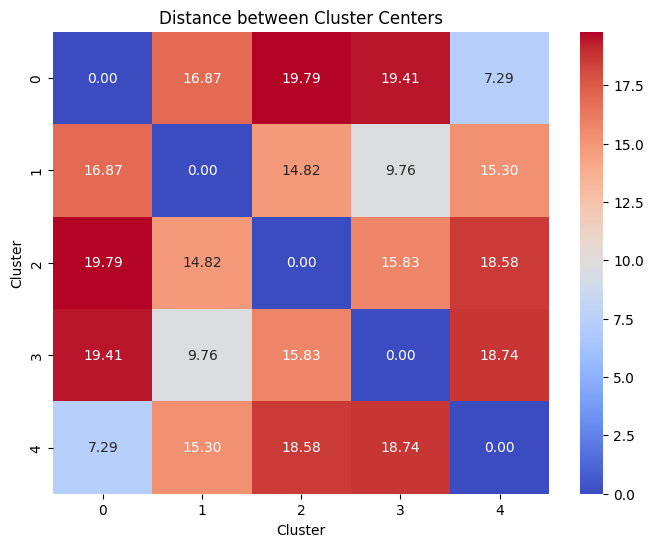

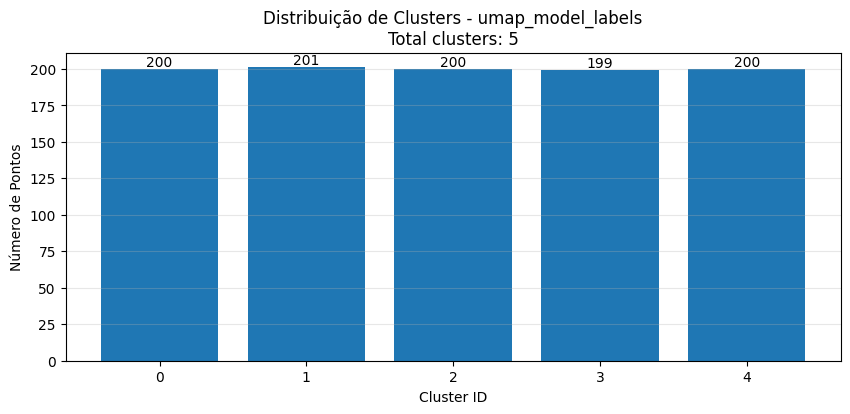

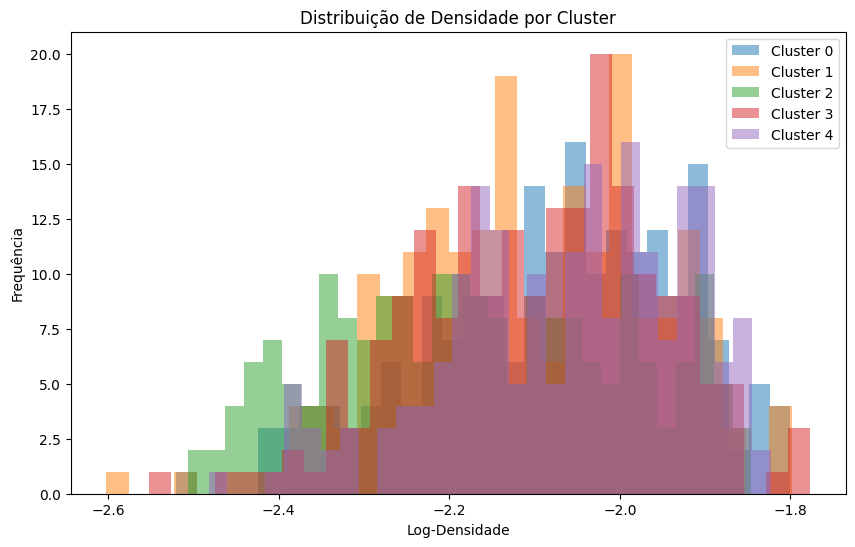

In [8]:
a.get_result_analysis()